Epochs:   7%|▋         | 1/15 [04:04<57:07, 244.85s/it]


Epoch 1 complete	Training Loss: 2.068134	Validation Loss: 1.931182



Epochs:  13%|█▎        | 2/15 [08:16<53:57, 249.06s/it]


Epoch 2 complete	Training Loss: 1.844533	Validation Loss: 1.856255



Epochs:  20%|██        | 3/15 [12:21<49:23, 246.96s/it]


Epoch 3 complete	Training Loss: 1.767315	Validation Loss: 1.808353



Epochs:  27%|██▋       | 4/15 [16:34<45:42, 249.35s/it]


Epoch 4 complete	Training Loss: 1.710154	Validation Loss: 1.770917



Epochs:  33%|███▎      | 5/15 [20:43<41:34, 249.41s/it]


Epoch 5 complete	Training Loss: 1.663337	Validation Loss: 1.738268



Epochs:  40%|████      | 6/15 [24:44<36:58, 246.54s/it]


Epoch 6 complete	Training Loss: 1.622613	Validation Loss: 1.708736



Epochs:  47%|████▋     | 7/15 [28:22<31:37, 237.19s/it]


Epoch 7 complete	Training Loss: 1.587645	Validation Loss: 1.685606



Epochs:  53%|█████▎    | 8/15 [31:56<26:49, 229.87s/it]


Epoch 8 complete	Training Loss: 1.557872	Validation Loss: 1.663856



Epochs:  60%|██████    | 9/15 [35:43<22:53, 228.98s/it]


Epoch 9 complete	Training Loss: 1.532587	Validation Loss: 1.645331



Epochs:  67%|██████▋   | 10/15 [39:37<19:12, 230.52s/it]


Epoch 10 complete	Training Loss: 1.512393	Validation Loss: 1.628531



Epochs:  73%|███████▎  | 11/15 [43:43<15:40, 235.14s/it]


Epoch 11 complete	Training Loss: 1.497125	Validation Loss: 1.612334



Epochs:  80%|████████  | 12/15 [47:29<11:37, 232.47s/it]


Epoch 12 complete	Training Loss: 1.480150	Validation Loss: 1.597689



Epochs:  87%|████████▋ | 13/15 [51:25<07:46, 233.28s/it]


Epoch 13 complete	Training Loss: 1.466296	Validation Loss: 1.584878



Epochs:  93%|█████████▎| 14/15 [55:10<03:50, 230.94s/it]


Epoch 14 complete	Training Loss: 1.450843	Validation Loss: 1.572721



Epochs: 100%|██████████| 15/15 [58:56<00:00, 235.77s/it]


Epoch 15 complete	Training Loss: 1.437350	Validation Loss: 1.566231



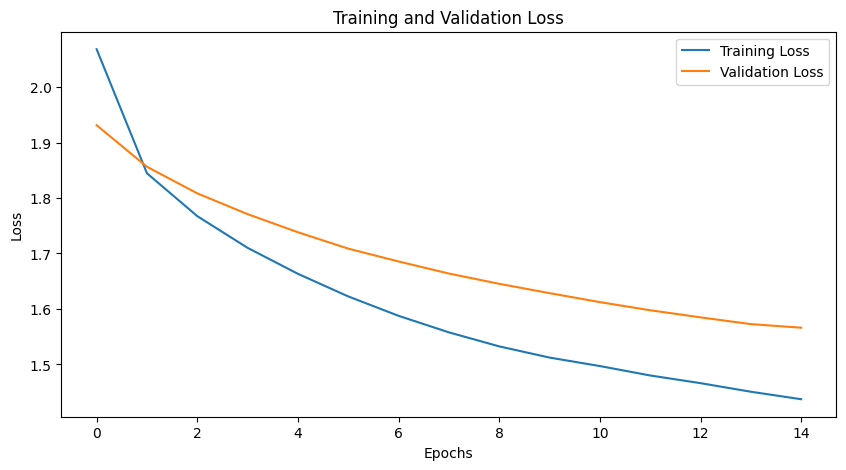

Accuracy: 45.290000


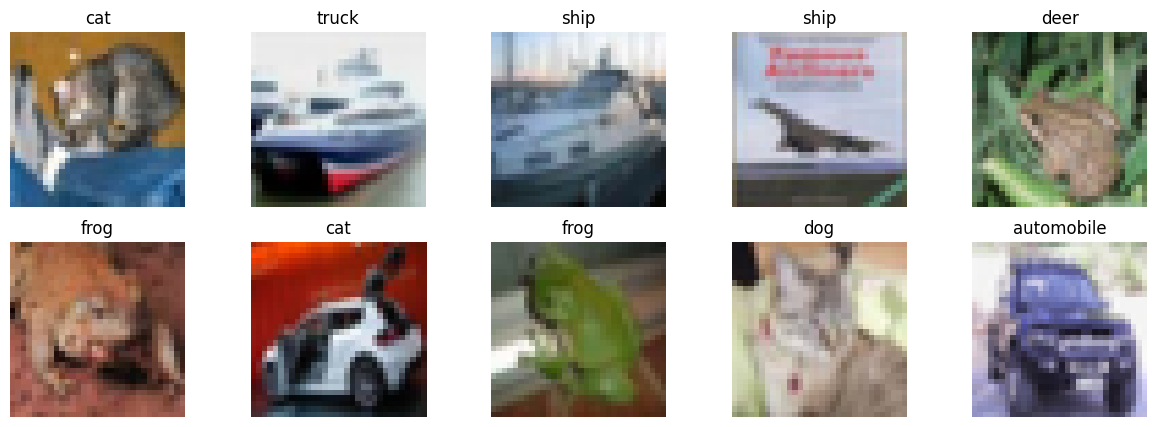

In [6]:
import numpy as np
import os
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np
import pickle
import os

# Function for loading a single batch of the cifar 10 dataset.
def load_cifar10_batch(filename):
    with open(filename, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
        X = dict[b'data']
        Y = dict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32")
        Y = np.array(Y)
        return X, Y

''' Function for loading all the training and testing batches. Training batches are concatenated 
    and testing batch is taken separately.'''

def load_cifar10(root):
    Xs = []
    Ys = []
    for b in range(1, 6):
        f = os.path.join(root, 'data_batch_%d' % (b,))
        X, Y = load_cifar10_batch(f)
        Xs.append(X)
        Ys.append(Y)
    X_train = np.concatenate(Xs)
    y_train = np.concatenate(Ys)
    
    X_test, y_test = load_cifar10_batch(os.path.join(root, 'test_batch'))
    
    return (X_train, y_train), (X_test, y_test)

# Converting class labels into vectors having 0's and 1's.
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# Obtaining x and y values of training and testing from the load_cifar10 function for CIFAR-10 data.
(x_train, y_train), (x_test, y_test) = load_cifar10('/kaggle/input/cifar10')

# Normalize the pixel data so thata values are in the range 0 to 1.
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels for 10 classes.
y_train = one_hot_encode(y_train, 10)
y_test = one_hot_encode(y_test, 10)

# Relu function calculation
def relu(x):
    return np.maximum(0, x)

# Function for finding the derivative of Relu.
def delta_relu(x):
    return np.where(x > 0, 1, 0)

# Implementation of softmax function.
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Measures the performance of model, which gives probability values in the range 0 to 1.
# Clipping is done to avoid getting log of 0.
def categorical_crossentropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    return -np.sum(targets * np.log(predictions))


class NeuralNetwork(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        # Xavier initialization for weights to keep the variance of 
        # of the activation same for every layer.
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) * np.sqrt(1/x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, x):
        activation = x
        activations = [x]  # Storing activations for every layer.
        outs = []  # Storing out vectors for every layer.
        # Applying relu activation function for all the hidden
        # layers.
        for b, w in zip(self.biases[:-1], self.weights[:-1]):
            out = np.dot(w, activation) + b
            outs.append(out)
            activation = relu(out)
            activations.append(activation)
        # Applying softmax function in the output layer.
        out = np.dot(self.weights[-1], activation) + self.biases[-1]
        outs.append(out)
        activation = softmax(out)
        activations.append(activation)
        return outs, activations
    
    # This function generates batches after iterating on the dataset.
    def get_batch(self, X, y, batch_size):
        for batch_idx in range(0, X.shape[0], batch_size):
            yield X[batch_idx:batch_idx + batch_size], y[batch_idx:batch_idx + batch_size]
    
    # Training the model.
    def train(self, X, y, X_val, y_val, batch_size=128, learning_rate=0.01, epochs=20):
        n_batches = X.shape[0] // batch_size
        training_losses = []
        validation_losses = []
        # Iterating over the number of epochs specified and checking the 
        # estimated time for completion.
        for j in tqdm(range(epochs), desc="Epochs"):
            epoch_loss = 0
            batch_iter = self.get_batch(X, y, batch_size)
            for i in range(n_batches):
                try:
                    batch_X, batch_y = next(batch_iter)
                except StopIteration:
                    break
                # same shape as self.biases
                del_b = [np.zeros(b.shape) for b in self.biases]
                # same shape as self.weights
                del_w = [np.zeros(w.shape) for w in self.weights]
                for x, y_ in zip(batch_X, batch_y):
                    # accumulate all the bias and weight gradients
                    loss, delta_del_b, delta_del_w = self.backpropagate(x, y_)
                    del_b = [db + ddb for db, ddb in zip(del_b, delta_del_b)]
                    del_w = [dw + ddw for dw, ddw in zip(del_w, delta_del_w)]
                
                self.weights = [w - (learning_rate / batch_size) * delw for w, delw in zip(self.weights, del_w)]
                self.biases = [b - (learning_rate / batch_size) * delb for b, delb in zip(self.biases, del_b)]
                epoch_loss += loss

            # Calculating the average epoch loss.
            epoch_loss /= n_batches
            training_losses.append(epoch_loss)

            # Calculating the validation loss.
            val_loss = self.calculate_loss(X_val, y_val)
            validation_losses.append(val_loss)

            print(f"\nEpoch {j + 1} complete\tTraining Loss: {epoch_loss:.6f}\tValidation Loss: {val_loss:.6f}\n")

        return training_losses, validation_losses
    # Calculating the loss over the dataset.
    def calculate_loss(self, X, y):
        loss = 0
        for x, _y in zip(X, y):
            _, activations = self.feedforward(x)
            loss += categorical_crossentropy(activations[-1], _y)
        return loss / X.shape[0]

    def backpropagate(self, x, y):
        # Storing gradients of loss function with respect to biases.
        del_b = [np.zeros(b.shape) for b in self.biases]
        # Storing gradients of loss function with respect to weights.
        del_w = [np.zeros(w.shape) for w in self.weights]

        # outs has weighted sum before applying activation function and activations has activations after applying activation functions.
        outs, activations = self.feedforward(x)
        # Computing loss.
        loss = categorical_crossentropy(activations[-1], y)
        # Calculating derivative of cost categorical cross entropy.
        delta_cost = activations[-1] - y
        # Gradients at output layers
        delta = delta_cost
        del_b[-1] = delta
        # Calculating the gradient.
        del_w[-1] = np.dot(delta, activations[-2].T)

        for l in range(2, self.num_layers):
            out = outs[-l]
            delta_activation = delta_relu(out)
            delta = np.dot(self.weights[-l + 1].T, delta) * delta_activation
            del_b[-l] = delta
            del_w[-l] = np.dot(delta, activations[-l - 1].T)
        return (loss, del_b, del_w)
    
    # Used for evaluating the accuracy of the network on 
    # the dataset.
    def eval(self, X, y):
        count = 0
        for x, _y in zip(X, y):
            outs, activations = self.feedforward(x)
            # position of maximum value is the predicted label
            if np.argmax(activations[-1]) == np.argmax(_y):
                count += 1
        accuracy = (float(count) / X.shape[0]) * 100
        print("Accuracy: %f" % accuracy)

    def predict(self, X):
        labels = ["airplane", "automobile", "bird", "cat",
                  "deer","dog", "frog", "horse", "ship", "truck"]
        preds = np.array([])
        for x in X:
            outs, activations = self.feedforward(x)
            preds = np.append(preds, np.argmax(activations[-1]))
        preds = np.array([labels[int(p)] for p in preds])
        return preds

    def predict_with_images(self, X):
        labels = ["airplane", "automobile", "bird", "cat", "deer",
            "dog", "frog", "horse", "ship", "truck"]
        preds = []
        for x in X:
            outs, activations = self.feedforward(x)
            pred = np.argmax(activations[-1])
            preds.append((x, labels[int(pred)]))
        return preds

def plot_losses(training_losses, validation_losses):
    plt.figure(figsize=(10, 5))
    # Plotting training loss.
    plt.plot(training_losses, label='Training Loss')
    # Plotting validation loss.
    plt.plot(validation_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

def plot_predictions(predictions, num_images=10):
    plt.figure(figsize=(15, 5))
    for i, (img, label) in enumerate(predictions[:num_images]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.reshape(32, 32, 3))
        plt.title(label)
        plt.axis('off')
    plt.show()

def main():
    global x_train, y_train, x_test, y_test

    X_train = x_train.reshape(-1, 3072, 1)
    Y_train = y_train.reshape(-1, 10, 1)
    X_test = x_test.reshape(-1, 3072, 1)
    Y_test = y_test.reshape(-1, 10, 1)

    # Split train data into train and validation sets
    X_val = X_train[:5000]
    Y_val = Y_train[:5000]
    X_train = X_train[5000:]
    Y_train = Y_train[5000:]

    # Initialize the model
    model = NeuralNetwork([3072, 256, 64, 10])

    # Training the model.
    training_losses, validation_losses = model.train(X_train, Y_train, X_val, Y_val, epochs=15)

    # Plotting the training losses and validation losses.
    plot_losses(training_losses, validation_losses)

    # Evaluating the model.
    model.eval(X_test, Y_test)

    # Making predictions on test dataset.
    predictions = model.predict_with_images(X_test)

    # Plotting the images with predicted labels.
    plot_predictions(predictions)

if __name__ == "__main__":
    main()